## Modulo para importar tasas de Swap Cámara Promedio en Peso y UF desde Banco Central

Importación de librerías y modulos para web scraping

In [2]:
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath(".."))

from web_scraping import scraping_tasas as ws

Se definen rutas para obtener data

SPC CLP y UF

In [3]:
swap = True
URL_PESOS, URL_UF = ws.obtener_urls(swap = swap)
URL_PESOS

'https://si3.bcentral.cl/Siete/ES/Siete/Cuadro/CAP_TASA_INTERES/MN_TASA_INTERES_09/TI__TPM4/T31b?cbFechaDiaria={year}&cbFrecuencia=DAILY&cbCalculo=NONE&cbFechaBase='

Bonos del Banco Central en Pesos y UF BTP y BTU

Se llaman las funciones y se parsean los elementos para ser trabajados como dataframe tabular.

*Nota: En caso de buscar otras tablas o información, se debe ajustar el proceso de data cleaning para cada caso particular.*

In [4]:
# Ejemplo de consulta para varios años
years = [2024, 2025]  # por ejemplo

# Descarga y concatenación de datos
df_pesos_raw = ws.fetch_multiple_years(URL_PESOS, years)
df_uf_raw = ws.fetch_multiple_years(URL_UF, years)

# Unir ambos DataFrames
df_total = pd.concat([df_pesos_raw, df_uf_raw], ignore_index=True)

# Aplicar renombrado y extraer vencimientos
df_total, tenor_dict = ws.apply_renaming(df_total, swap=swap)

# Generar pivot
pivot_df = ws.pivot_data(df_total)

# Separar instrumentos en pesos y UF (según prefijo)
df_pesos, df_uf = ws.separate_instruments(pivot_df, swap=swap)


Graficamos la data

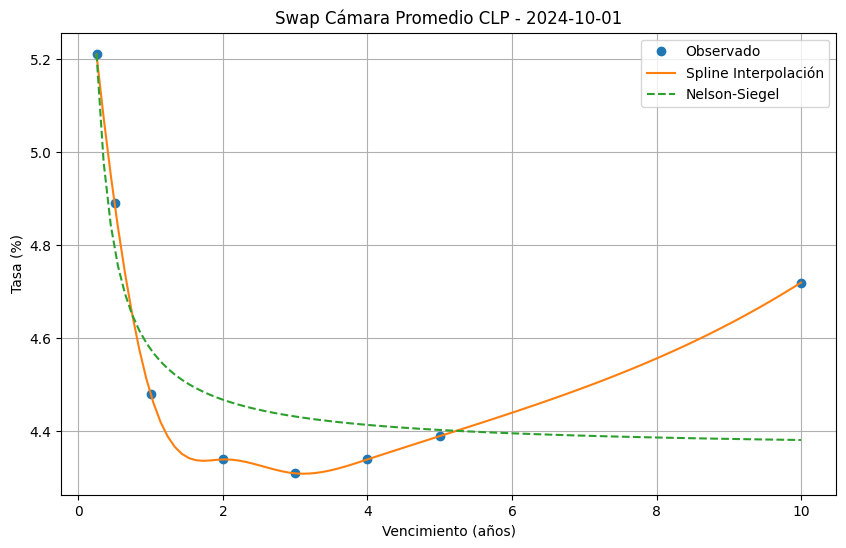

In [5]:

# Elegir una fecha (por ejemplo, la primera fecha disponible de cada grupo)
# Para pesos:
if not df_pesos.empty:
    date = df_pesos.index[0]
    date = df_pesos.index[-2]
    date = pd.Timestamp("2024-10-01 00:00:00")
    TITLE = "Swap Cámara Promedio CLP"
    pivot_df = df_pesos.copy()
    ws.plot_curve_for_date(pivot_df, tenor_dict, date, title=TITLE)


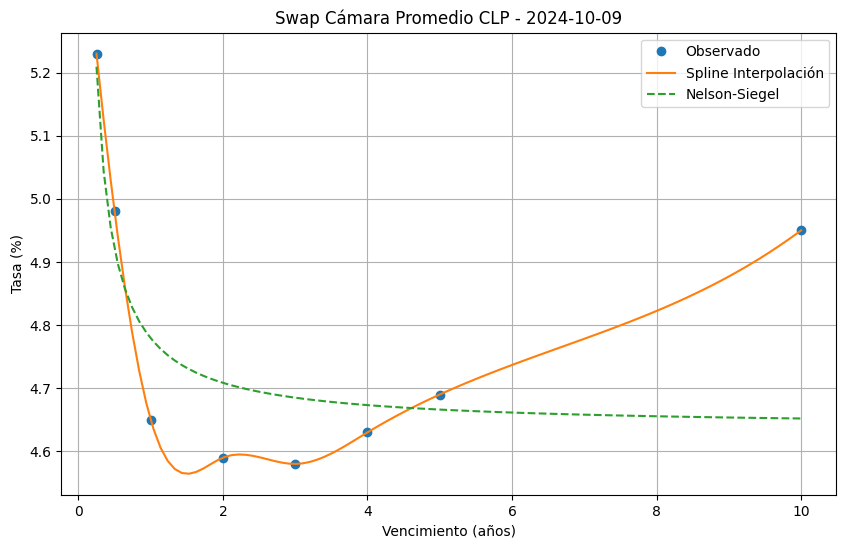

In [6]:

# Elegir una fecha (por ejemplo, la primera fecha disponible de cada grupo)
# Para pesos:
if not df_pesos.empty:
    date = df_pesos.index[0]
    date = df_pesos.index[-2]
    date = pd.Timestamp("2024-10-09 00:00:00")
    TITLE = "Swap Cámara Promedio CLP"
    pivot_df = df_pesos.copy()
    ws.plot_curve_for_date(pivot_df, tenor_dict, date, title=TITLE)


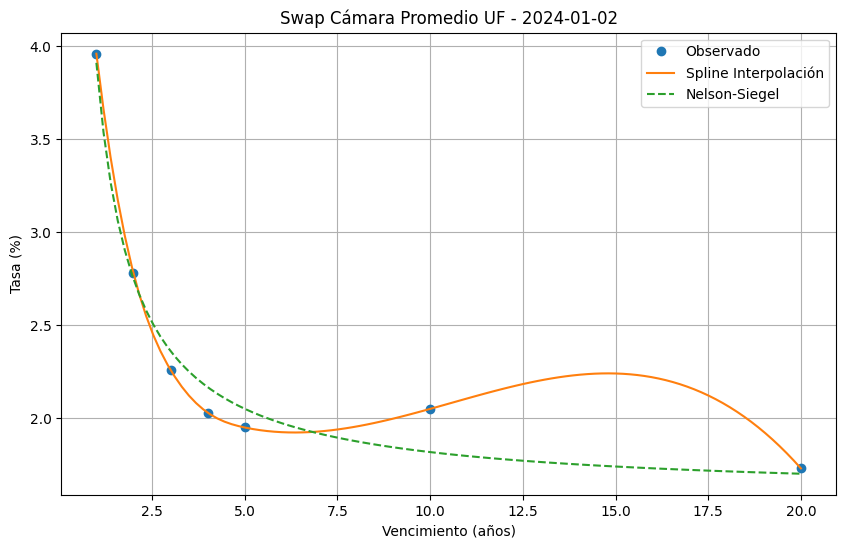

In [7]:

# Para UF:
if not df_uf.empty:
    date = df_uf.index[0]
    TITLE = "Swap Cámara Promedio UF"
    ws.plot_curve_for_date(df_uf, tenor_dict, date, title=TITLE)

In [9]:
date = pd.Timestamp("2024-10-09 00:00:00")
data = df_pesos.loc[date].dropna()
data

Serie
SPCCLP90     5.23
SPCCLP180    4.98
SPCCLP360    4.65
SPCCLP2      4.59
SPCCLP3      4.58
SPCCLP4      4.63
SPCCLP5      4.69
SPCCLP10     4.95
Name: 2024-10-09 00:00:00, dtype: float64